In [1]:
import os 
import numpy as np 
import pandas as pd
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
#from imblearn.under_sampling import RandomUnderSampler|
from sklearn.datasets import make_classification
import re
import json

### Making it more robust, adding avearging thing (before revision version)


In [2]:
#============================ Change direc if needed ================================#
#1. wo IN, freeze 20 
#directory = '/sdcc/u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_results_for_debugging/' #hyperparm tuning for ADNI sex
#won't work with the thing above, where it wasn't modified


#2. w IN, freeze 20 
directory = "/direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_results_InstanceBN/"

#3. w IN, tuneall 20
#TODO
#4. w IN freeaze 100
#TODO
#5. w IN tuneall 100 
#TODO
#must add reg

In [3]:
#! ls -R $directory | grep eval_

In [4]:
#step1 : cls_df, reg_df 불러오기 

from utils import finetune_utils, plotting
cls_df, reg_df = finetune_utils.extract_json(directory)

<<<<<<<< FILE NAME is  ADNI_sex-freeze-cls >>>>>>>>
<<<<<<<< param  None-train_20 >>>>>>>>
<<<<<<<< model batch_8-lr_0.01-wd_1e-05-tf_cutout >>>>>>>>
<<<<<<<< model batch_16-lr_0.01-wd_1e-05-tf_cutout >>>>>>>>
<<<<<<<< model batch_16-lr_1.0-wd_1e-05-tf_cutout >>>>>>>>
<<<<<<<< model batch_8-lr_1.0-wd_1e-05-tf_cutout >>>>>>>>
<<<<<<<< model batch_8-lr_1.0-wd_1e-07-tf_cutout >>>>>>>>
<<<<<<<< model batch_16-lr_1.0-wd_1e-07-tf_cutout >>>>>>>>
<<<<<<<< model batch_8-lr_100.0-wd_0.001-tf_cutout >>>>>>>>
<<<<<<<< model batch_16-lr_0.1-wd_0.001-tf_cutout >>>>>>>>
<<<<<<<< model batch_8-lr_0.1-wd_0.001-tf_cutout >>>>>>>>
<<<<<<<< model batch_16-lr_100.0-wd_0.001-tf_cutout >>>>>>>>
<<<<<<<< model batch_8-lr_1e-05-wd_0.001-tf_cutout >>>>>>>>
<<<<<<<< model batch_16-lr_1e-05-wd_0.001-tf_cutout >>>>>>>>
<<<<<<<< model batch_8-lr_100.0-wd_0.01-tf_cutout >>>>>>>>
<<<<<<<< model batch_16-lr_100.0-wd_0.01-tf_cutout >>>>>>>>
<<<<<<<< model batch_8-lr_0.1-wd_0.01-tf_cutout >>>>>>>>
<<<<<<<< model batch_

In [5]:
#step2 : 위에서 구한 것에서 mean, std 추출하기 

#don't include the metric cols here (자동으루 추가되게 해놓음)
cols_to_include = ['Taskname', 'param','task', 'tf', 
                   'batch_size', 'lr', 'weight_decay','task_name', 'input_size', 'resize_method', 'layer_control', 'train_num' , 'stratify']
#weight name, freeze or tune_all, number of samples used, stratified 여부,  같은 정보가 없음 ... 일단은 skip 
#how much epoch was done 
#batchsize : 있기는 한데,  흠... 위에다가 넣으면 에러가뜸.. 왜 그런지는 모르겠다...저장은 안되는듯..? 


#이건 cls만 보는 것!
mode = 'cls'
df = cls_df

final_stats = finetune_utils.stats_pd(df, cols_to_include, mode)

#make one for reg

skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_0.0001-wd_0.01-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_1e-06-wd_1e-07-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_2e-05-wd_5e-05-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_2e-05-wd_0.0001-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_0.0001-wd_1e-06-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_4e-05-wd_0.0001-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_0.01-wd_0.0001-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_0.0005-wd_0.005-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_1e-05-wd_0.0001-tf_cutout because it was em

In [6]:
#step3 : plotting the thing 
def generate_heatmap(df, cols2plot, col_names, title,log_scales = [False, False], log_inputs = [True, True],vmin = None, vmax = None) :  
    """
    * df : dataframe to sue 
    * cols2plot : list of x, y, z cols to plot from df
    * col_names : list of x, y, z col names to use (labels)
    * title : plot title 
    * log_scales : what scales to use for x and y labels (defaults to True log scales)
    * log_inputs : whether to log-ize the inputs before putting them in 
    * vmin, vmax : min,max value to set for imshow (default, None)
    """
    arr = df[cols2plot].to_numpy()
    
    x, y, z = arr[:,0], arr[:,1], arr[:,2]
    if log_inputs[0] == True:
        x = np.log10(x)
    if log_inputs[1] == True:
        y = np.log10(y)
    heatmap = plotting.nonuniform_imshow(x,y,z, vmin = vmin, vmax = vmax)
    #heatmap = plotting.nonuniform_imshow(arr[:,0], arr[:,1], arr[:,2], vmin = vmin, vmax = vmax)
    #heatmap = plotting.nonuniform_imshow(np.log10(arr[:,0]), np.log10(arr[:,1]), arr[:,2], vmin = vmin, vmax = vmax)
    cb = plt.colorbar(heatmap)

    plt.xscale('log')  if log_scales[0] == True else None
    plt.yscale('log') if log_scales[1] == True else None
    plt.xlabel(col_names[0])
    plt.ylabel(col_names[1])
    cb.set_label(col_names[2])
    plt.title(title)
    plt.show()
    print(f"min {np.min(arr[:,2])}")
    print(f"max {np.max(arr[:,2])}")



In [7]:
print(set(final_stats.Taskname)) #여기랑 batch_size를 조절해줘야함!
print(set(final_stats.batch_size))

{'ADNI_sex-freeze-cls_None-train_20', 'ABCD_sex-tune_all-cls_None-train_100', 'ADNI_sex-tune_all-cls_UKByAa64a-train_20', 'ABCD_sex-freeze-cls_None-train_100', 'ABCD_sex-tune_all-cls_yAw_ver_None-train_100', 'ADNI_sex-freeze-cls_UKByAa64a-train_20', 'ADNI_sex-tune_all-cls_ABCDbt128a102-train_100', 'ABCD_sex-freeze-cls_ABCDbt128a102-train_100', 'ABCD_sex-tune_all-cls_ABCDbt128a102-train_100', 'ADNI_sex-tune_all-cls_None-train_100', 'ADNI_sex-tune_all-cls_UKByAa64a-train_100', 'ADNI_sex-tune_all-cls_None-train_20'}
{16, 8}


In [8]:
final_stats = finetune_utils.stats_pd(cls_df, cols_to_include, mode)

skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_0.0001-wd_0.01-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_1e-06-wd_1e-07-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_2e-05-wd_5e-05-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_2e-05-wd_0.0001-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_0.0001-wd_1e-06-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_4e-05-wd_0.0001-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_0.01-wd_0.0001-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_0.0005-wd_0.005-tf_cutout because it was empty
skipped iteration ADNI_sex-freeze-cls_None-train_20, batch_16-lr_1e-05-wd_0.0001-tf_cutout because it was em

In [9]:
import numpy as np
import math
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
def plot_contour(ax, x, y, z, vmin=None, vmax=None):
    seed(1234)
 
    #print(z)
    
    x = np.delete(x, np.argwhere(np.isnan(z)))
    y = np.delete(y, np.argwhere(np.isnan(z)))
    z = np.delete(z, np.argwhere(np.isnan(z)))
    
    #print(z)
              
    xi = np.linspace(x.min(),x.max(),1000)
    yi = np.linspace(y.min(),y.max(),1000)
    
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    #print(zi)
    
    ax.set_aspect(1)

    if vmin == None or vmax == None:
        levels = 30
    else : 
        levels = np.linspace(vmin, vmax, 20)

    CS = ax.contour(xi,yi,zi, levels,linewidths=0.5,colors='k')
    CS = ax.contourf(xi,yi,zi,levels,cmap=plt.cm.jet)
    plt.colorbar(CS, ax = ax) #When calling plt.colorbar(CS,ax=ax), the ax parameter tells the colorbar function to use the subplot axes that was passed to the plot_contour function (ax) as the parent axes, instead of creating a new one. This way, the colorbar will be plotted in the same subplot as the contour plot and not as a separate figure.
    ax.scatter(x,y,marker='o',c='black', alpha = 0.3)
    margin = 0.1
    ax.set_xlim(x.min()-margin,x.max()+margin)
    ax.set_ylim(y.min()-margin,y.max()+margin)
    

    print(f"min {np.min(z)}")
    print(f"max {np.max(z)}")
    
    # getting the indices of the minimum and maximum value in the contour plot
    #tmp = np.where(zi == np.nanmin(zi))
    #min_ind = np.array([xi[tmp[0]], yi[tmp[1]]])
    min_ind = np.where(zi == np.nanmin(zi))
    max_ind = np.where(zi == np.nanmax(zi))
    print(min_ind)
    print(max_ind)
    print(np.nanmax(zi))
    
    #tmp = np.where(zi == np.nanmax(zi))
    #max_ind = np.array([xi[tmp[0]], yi[tmp[1]]])
    #print(min_ind)
    #print(max_ind)
    #import pdb; pdb.set_trace()
    
    
    #min_ind = np.unravel_index(np.argmin(zi), zi.shape)
    #max_ind = np.unravel_index(np.argmax(zi), zi.shape)

    # plotting the minimum and maximum value on the contour plot
    axs[i].scatter(xi[min_ind[0]], yi[min_ind[1]], marker='o', c='black', s=50)
    axs[i].annotate(f"{zi.min():.3f}", xy=(xi[min_ind[0]], yi[min_ind[1]]), xytext=(5, 5), textcoords='offset points', fontsize=10)

    axs[i].scatter(xi[max_ind[0]], yi[max_ind[1]], marker='o', c='black', s=50)
    axs[i].annotate(f"{zi.max():.3f}", xy=(xi[max_ind[0]], yi[max_ind[1]]), xytext=(5, 5), textcoords='offset points', fontsize=10)


{'ADNI_sex-freeze-cls_None-train_20', 'ABCD_sex-tune_all-cls_None-train_100', 'ADNI_sex-tune_all-cls_UKByAa64a-train_20', 'ABCD_sex-freeze-cls_None-train_100', 'ABCD_sex-tune_all-cls_yAw_ver_None-train_100', 'ADNI_sex-freeze-cls_UKByAa64a-train_20', 'ADNI_sex-tune_all-cls_ABCDbt128a102-train_100', 'ABCD_sex-freeze-cls_ABCDbt128a102-train_100', 'ABCD_sex-tune_all-cls_ABCDbt128a102-train_100', 'ADNI_sex-tune_all-cls_None-train_100', 'ADNI_sex-tune_all-cls_UKByAa64a-train_100', 'ADNI_sex-tune_all-cls_None-train_20'}
instBN이랑 일반이랑 위에서 directory정의 다르게 해서 비교하기! (with same vmin and vmax values
ADNI_sex-freeze-cls_None-train_20 8 auroc_mean
min 0.49022915959358215
max 0.6352059841156006
(array([628]), array([0]))
(array([794]), array([454]))
0.6394276924708195
ADNI_sex-freeze-cls_None-train_20 8 auroc_std
min 0.06459169089794159
max 0.10612764209508896
(array([799]), array([361]))
(array([514]), array([318]))
0.1199919557502636


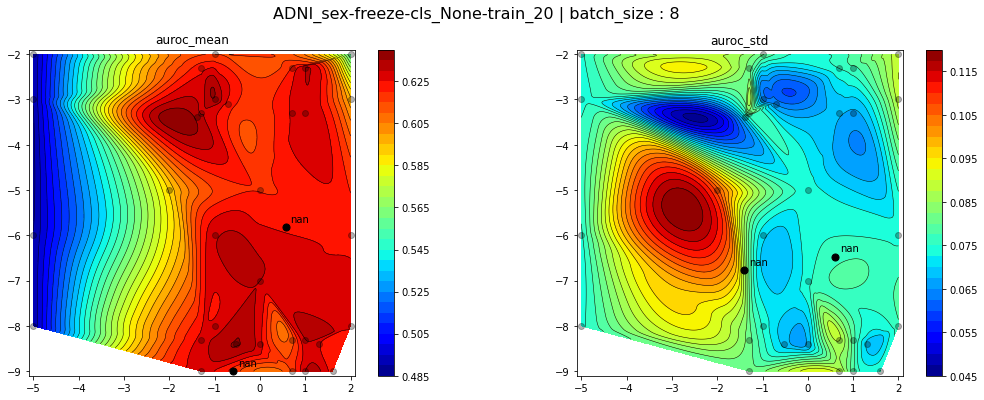

ADNI_sex-freeze-cls_UKByAa64a-train_20 8 auroc_mean
min 0.5023435354232788
max 0.6345102787017822
(array([304]), array([0]))
(array([122]), array([729]))
0.6418559059851542
ADNI_sex-freeze-cls_UKByAa64a-train_20 8 auroc_std
min 0.04608292877674103
max 0.09185047447681427
(array([139]), array([338]))
(array([999]), array([999]))
0.09185047447681427


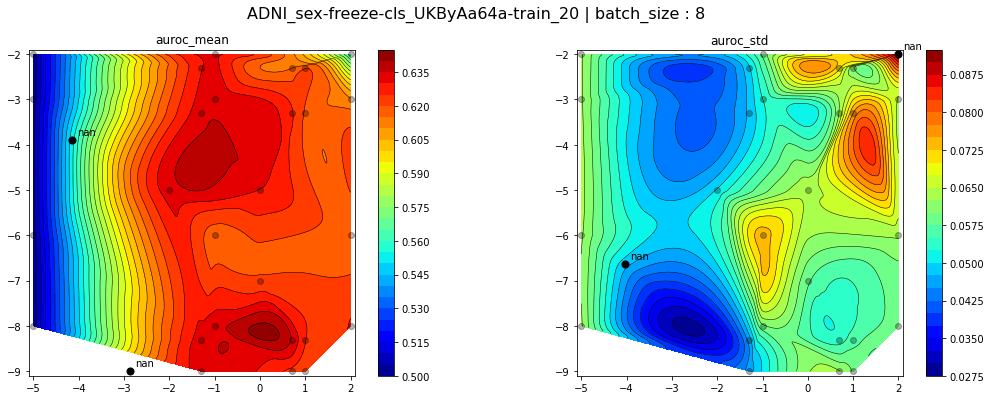

ABCD_sex-freeze-cls_ABCDbt128a102-train_100 16 auroc_mean
min 0.4841766357421875
max 0.5098002552986145
(array([589]), array([414]))
(array([389]), array([717]))
0.515999239119041
ABCD_sex-freeze-cls_ABCDbt128a102-train_100 16 auroc_std
min 0.006580579560250044
max 0.019452502951025963
(array([736]), array([731]))
(array([518]), array([438]))
0.0220495427896772


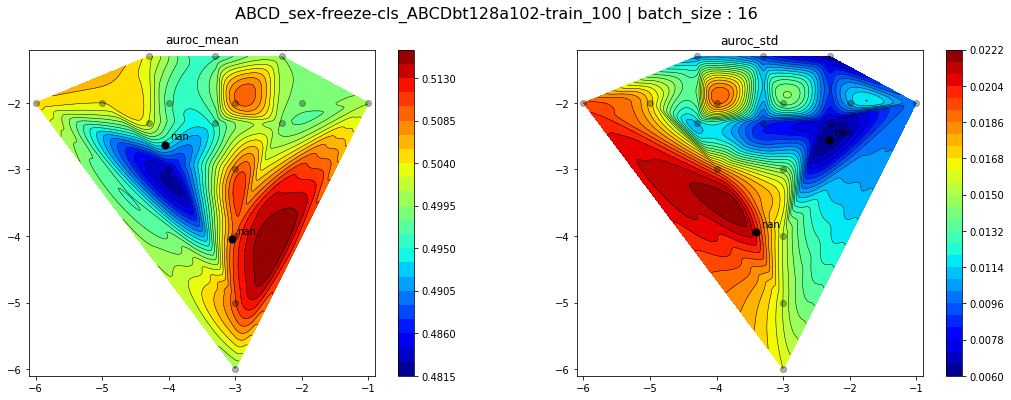

ABCD_sex-freeze-cls_None-train_100 16 auroc_mean
min 0.4934948682785034
max 0.5307644605636597
(array([876]), array([415]))
(array([851]), array([997]))
0.5307270173485972
ABCD_sex-freeze-cls_None-train_100 16 auroc_std
min 0.02956773340702057
max 0.04161016643047333
(array([853]), array([748]))
(array([757]), array([513]))
0.04248381898566102


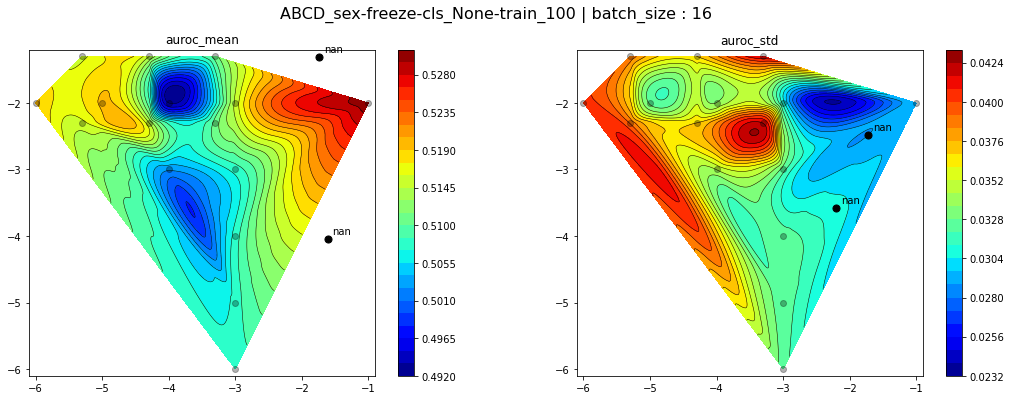

ABCD_sex-tune_all-cls_ABCDbt128a102-train_100 16 auroc_mean
min 0.4949414134025574
max 0.5240745544433594
(array([897]), array([670]))
(array([751]), array([503]))
0.5277111993886825
ABCD_sex-tune_all-cls_ABCDbt128a102-train_100 16 auroc_std
min 0.003993728663772345
max 0.04146397113800049
(array([800]), array([791]))
(array([775]), array([504]))
0.04342932984168767


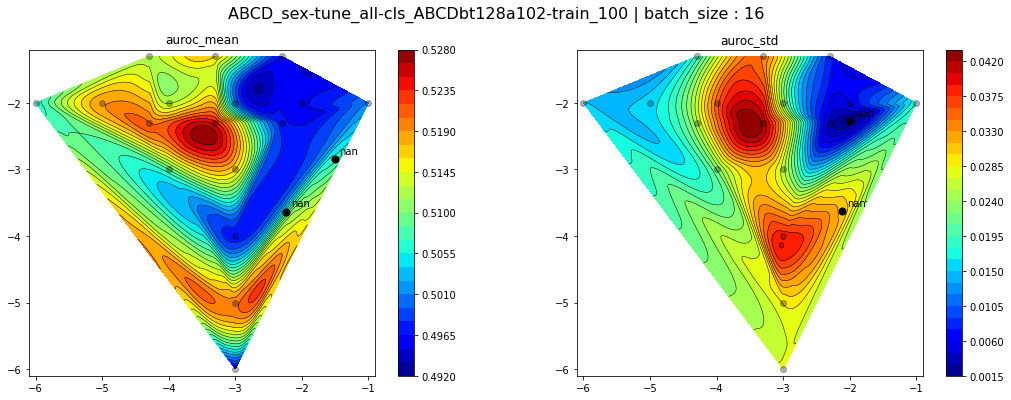

ABCD_sex-tune_all-cls_None-train_100 16 auroc_mean
min 0.4908710718154907
max 0.5602671504020691
(array([295]), array([738]))
(array([686]), array([203]))
0.5630573220069669
ABCD_sex-tune_all-cls_None-train_100 16 auroc_std
min 0.00663070660084486
max 0.04511862248182297
(array([850]), array([998]))
(array([991]), array([564]))
0.045359767093471566


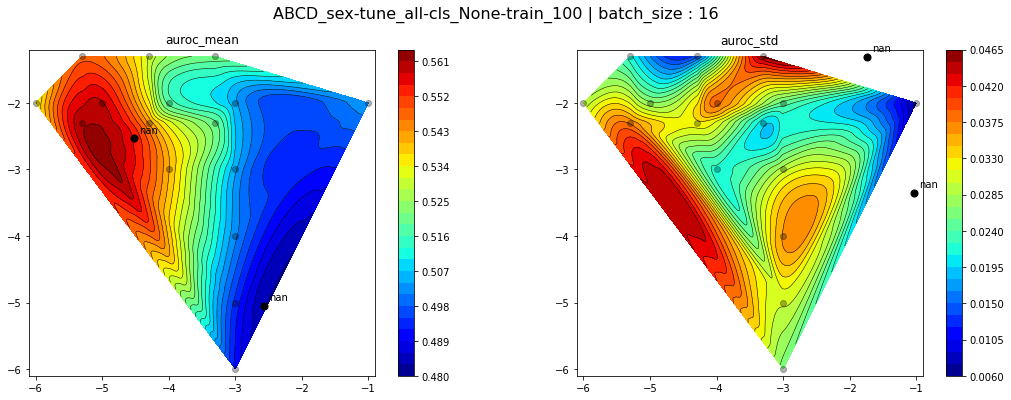

ABCD_sex-tune_all-cls_yAw_ver_None-train_100 16 auroc_mean
min 0.4935842454433441
max 0.5275434255599976
(array([0]), array([999]))
(array([0]), array([0]))
0.5275434255599976
ABCD_sex-tune_all-cls_yAw_ver_None-train_100 16 auroc_std
min 0.013931444846093655
max 0.03258679062128067
(array([999]), array([694]))
(array([0]), array([0]))
0.03258679062128067


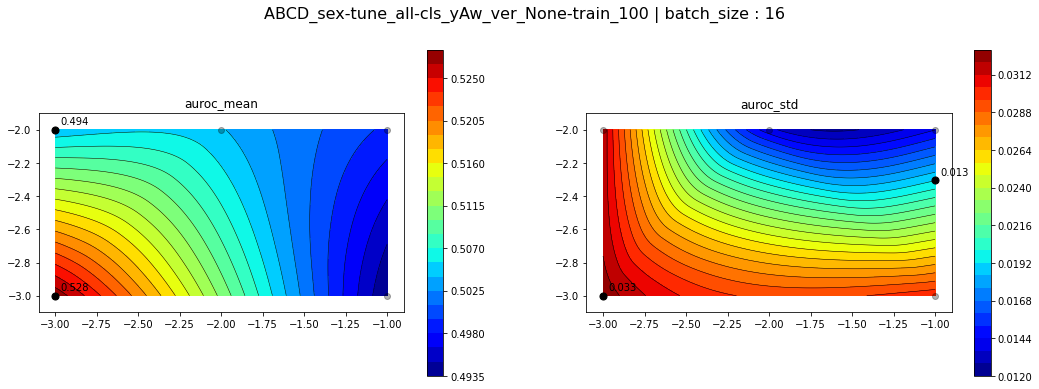

ADNI_sex-freeze-cls_None-train_20 16 auroc_mean
min 0.49012869596481323
max 0.6350095868110657
(array([716]), array([0]))
(array([536]), array([786]))
0.6379801026892589
ADNI_sex-freeze-cls_None-train_20 16 auroc_std
min 0.060331691056489944
max 0.08280983567237854
(array([953]), array([339]))
(array([743]), array([894]))
0.08858166368453856


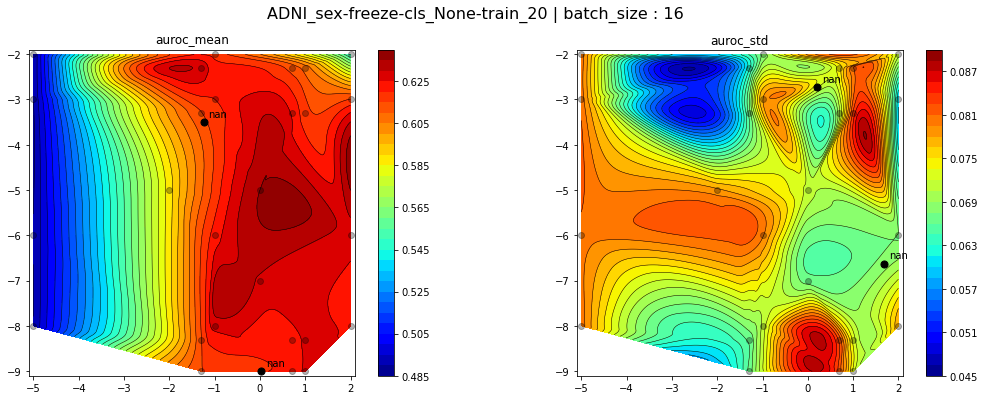

ADNI_sex-freeze-cls_UKByAa64a-train_20 16 auroc_mean
min 0.4840032160282135
max 0.634185791015625
(array([306]), array([0]))
(array([956]), array([706]))
0.6582055124376104
ADNI_sex-freeze-cls_UKByAa64a-train_20 16 auroc_std
min 0.05191988870501518
max 0.088213711977005
(array([953]), array([708]))
(array([959]), array([914]))
0.10190458544346455


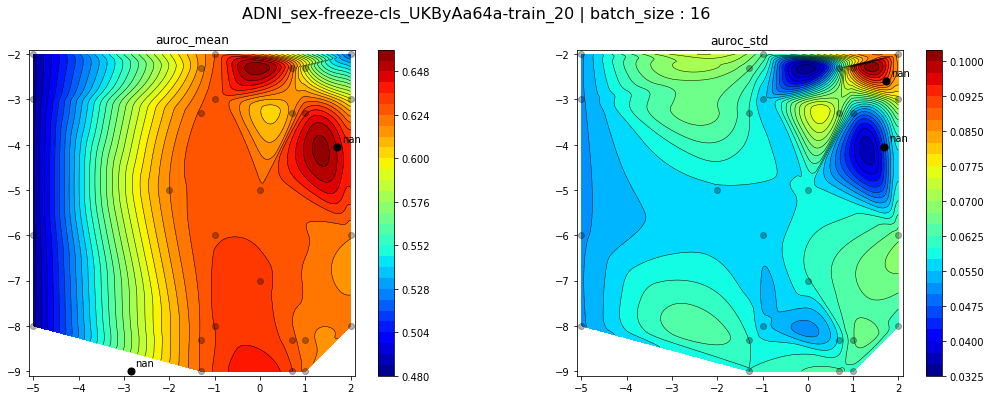

ADNI_sex-tune_all-cls_ABCDbt128a102-train_100 16 auroc_mean
min 0.476950079202652
max 0.5719702243804932
(array([0]), array([999]))
(array([999]), array([0]))
0.5719702243804932
ADNI_sex-tune_all-cls_ABCDbt128a102-train_100 16 auroc_std
min 0.0
max 0.06852930784225464
(array([999]), array([419]))
(array([999]), array([999]))
0.06852930784225464


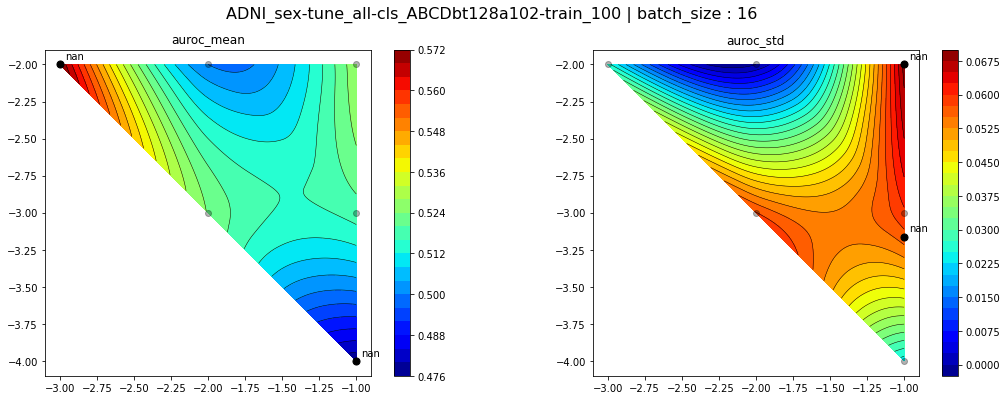

ADNI_sex-tune_all-cls_None-train_100 16 auroc_mean
min 0.5076387524604797
max 0.6078619956970215
(array([999]), array([759]))
(array([828]), array([0]))
0.6133110527284593
ADNI_sex-tune_all-cls_None-train_100 16 auroc_std
min 0.02692103572189808
max 0.10252097994089127
(array([999]), array([999]))
(array([509]), array([507]))
0.10257684456158027


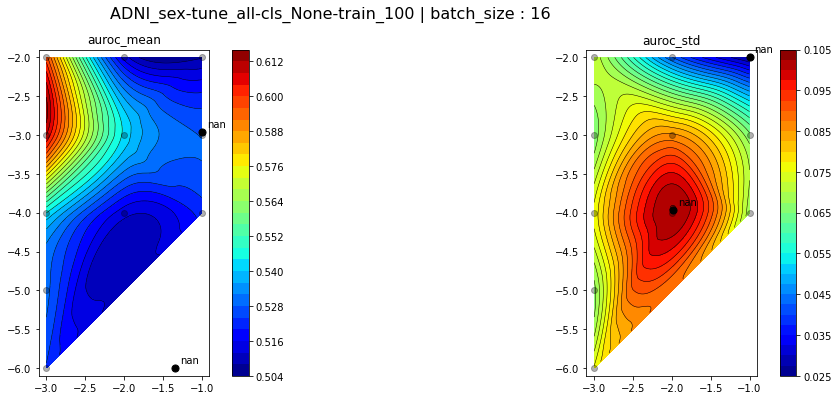

ADNI_sex-tune_all-cls_None-train_20 16 auroc_mean
min 0.4752771556377411
max 0.6197116374969482
(array([999]), array([0]))
(array([535]), array([529]))
0.6351584676421633
ADNI_sex-tune_all-cls_None-train_20 16 auroc_std
min 0.0061141992919147015
max 0.1215226873755455
(array([873]), array([998]))
(array([627]), array([386]))
0.1307453620501089


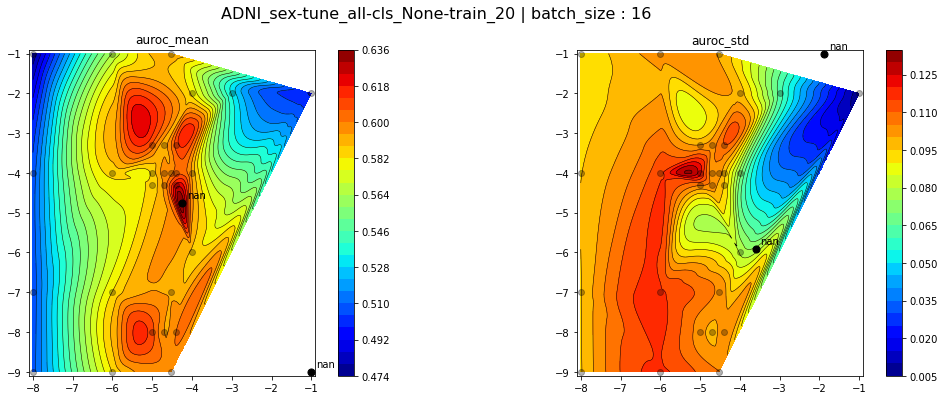

ADNI_sex-tune_all-cls_UKByAa64a-train_100 16 auroc_mean
min 0.4979153573513031
max 0.5563338994979858
(array([828]), array([741]))
(array([999]), array([0]))
0.5563338994979858
ADNI_sex-tune_all-cls_UKByAa64a-train_100 16 auroc_std
min 0.02120381034910679
max 0.09043818712234497
(array([999]), array([604]))
(array([491]), array([0]))
0.0904834013668492


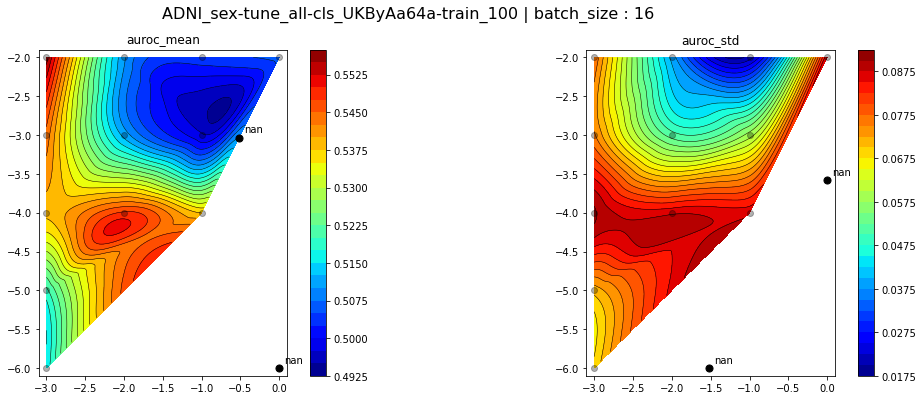

ADNI_sex-tune_all-cls_UKByAa64a-train_20 16 auroc_mean
min 0.4830232262611389
max 0.6537878513336182
(array([999]), array([0]))
(array([639]), array([677]))
0.6558540945740544
ADNI_sex-tune_all-cls_UKByAa64a-train_20 16 auroc_std
min 0.04171130433678627
max 0.11621800810098648
(array([478]), array([524]))
(array([521]), array([704]))
0.12730513381149888


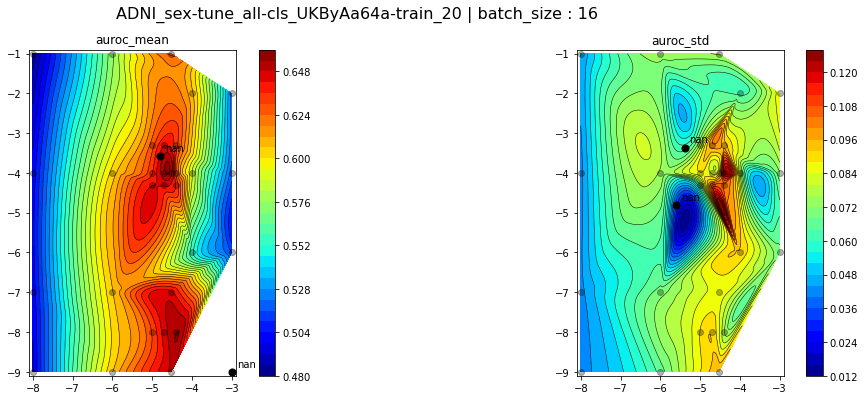

In [10]:
##### look_at_this = None

print(set(final_stats.Taskname))

print("instBN이랑 일반이랑 위에서 directory정의 다르게 해서 비교하기! (with same vmin and vmax values")

for batch_size in sorted(list(set(final_stats.batch_size))):
    for task_name in sorted(list(set(final_stats.Taskname))):
        
        look_at_this = final_stats[(final_stats['Taskname'] == task_name) & (final_stats["batch_size"] == batch_size )]
        
        metrics2plt = ['auroc_mean', 'auroc_std'] #'loss_mean', 'epoch_mean'
        
        x_y_data = look_at_this[['lr', 'weight_decay']].to_numpy() 
        
        x,y = x_y_data[:,0], x_y_data[:,1]
        x,y = np.log10(x), np.log10(y)   
        
        if x.shape[0] < 1 or y.shape[0] < 1 : #skip if empty
            continue        
        fig, axs = plt.subplots(1, len(metrics2plt), figsize=(18, 6))
        fig.suptitle(f'{task_name} | batch_size : {batch_size}', fontsize=16)
        
        for i,metric in enumerate(metrics2plt) : 
            print(task_name, batch_size, metric)
            z = look_at_this[[metric]].to_numpy()[:,0] #epoch_mean, loss_mean
            if metric == 'auroc_mean' :
                vmin , vmax = 0.55, 0.65
            else : 
                vmin , vmax = None, None
            #import pdb ; pdb.set_trace()
            plot_contour(axs[i],x,y,z) #, vmin = vmin, vmax = vmax)#) #vmin = 0.5, vmax = 0.65)
            axs[i].set_title(metric)
        plt.show()
        
##things to do

#exclude points that have only one seed!
#=> this might improve contour plot, as less variability 

##add annotating the max value using the code below (https://www.tutorialspoint.com/how-to-automatically-annotate-the-maximum-value-in-a-pyplot)
#ymax = max(y)
#xpos = np.where(y == ymax)
#xmax = x[xpos]
#
#ax.annotate('local max', xy=(xmax, ymax), xytext=(xmax, ymax + 5), arrowprops=dict(facecolor='black'),)

#also, mark each point with the number of seeds that were used (if seeds were less than 1, just remove it or sth)
#becasue I'm starting to think that the reason why some performance was not good was because of that 
#by passing the number of seeds during stats_pd

#also, plot the std of loss and auroc too! 
#the multiple peaks that occur might be due to the fact that the we aren't taking enough samples 



In [11]:
hihi

NameError: name 'hihi' is not defined

In [ ]:
x = np.array([0.1,0.2,0.3])
xi = np.linspace(x.min(),x.max(),10)

In [ ]:
xi[None, : ].shape

In [ ]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy.random import uniform, seed
def plot_contour(x,y,z, vmin = None, vmax = None):
    # make up some randomly distributed data
    seed(1234)
    # define grid.
    xi = np.linspace(x.min(),x.max(),1000)
    yi = np.linspace(y.min(),y.max(),1000)
    # grid the data.
    zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')
    # contour the gridded data, plotting dots at the randomly spaced data points.
    
    _, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect(1)
    
    if vmin == None or vmax == None:
        levels = 20 
    else : 
        levels = np.linspace(vmin, vmax, 20)
    
    CS = plt.contour(xi,yi,zi, levels,linewidths=0.5,colors='k')
    CS = plt.contourf(xi,yi,zi,levels,cmap=plt.cm.jet)
    plt.colorbar() # draw colorbar
    # plot data points.
    plt.scatter(x,y,marker='o',c='black', alpha = 0.3)
    
    margin = 0.1
    plt.xlim(x.min()-margin,x.max()+margin)
    plt.ylim(y.min()-margin,y.max()+margin)
    
    plt.show()
    print(f"min {np.min(z)}")
    print(f"max {np.max(z)}")
    


In [ ]:
final_stats = finetune_utils.stats_pd(cls_df, cols_to_include, mode)

In [ ]:
look_at_this = None

print(set(final_stats.Taskname))

print("instBN이랑 일반이랑 위에서 directory정의 다르게 해서 비교하기! (with same vmin and vmax values")

for batch_size in sorted(list(set(final_stats.batch_size))):
    for task_name in sorted(list(set(final_stats.Taskname))):
        print(task_name, batch_size)
        look_at_this = final_stats[(final_stats['Taskname'] == task_name) & (final_stats["batch_size"] == batch_size )]
        
        
        #metrics2plt = ['auroc_mean', 'loss_mean', 'epoch_mean']
        metrics2plt = ['auroc_mean']
        
        for metric in metrics2plt : 
            aa = look_at_this[['lr', 'weight_decay', metric]].to_numpy() #epoch_mean, loss_mean
            x,y,z = aa[:,0], aa[:,1], aa[:,2]
            x,y = np.log10(x), np.log10(y)   
            
            #if 0 in x.shape or 0 in y.shape or 0 in z.shape: #i.e. skip if empty array
            if x.shape[0] < 3 or y.shape[0] < 3 or z.shape[0] < 3 : 
                continue 
            print(f"plotting {metric}")
            plot_contour(x,y,z) #,vmin = 0.5, vmax = 0.65)

#for batch_size in set(final_stats.batch_size):
#    for task_name in tasks_to_see:
#        print(task_name, batch_size)
#        look_at_this = final_stats[(final_stats['Taskname'] == task_name) & (final_stats["batch_size"] == batch_size )]
#        aa = look_at_this[['lr', 'weight_decay','auroc_mean']].to_numpy()
#        x,y,z = aa[:,0], aa[:,1], aa[:,2]
#        x,y = np.log10(x), np.log10(y)   
#        
#        thing(x,y,z)

In [ ]:
look_at_this

In [ ]:
sorted(list(set(final_stats.batch_size)))

# INSTANCE BN 도 plottingg해보기!

# 내가 hyperparam range를 정하며
# => 아 아니다 within same condition seed variation을 보면 될듯) => 즉, 약 CV한 것을 다양한 seed값들로 20번 해서 variance가 어느정도 되는지, 그리고 seed몇개의 평균을 내야할지 해보기 (위에 그림들에서 보듯이, variation이 큰듯하다)

In [ ]:
import os
import json
import matplotlib.pyplot as plt

# Define the base directory containing the seed directories
base_dir = '/direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_results_InstanceBN/ADNI_sex-freeze-cls/None-train_20/batch_8-lr_0.1-wd_0.01-tf_cutout'

# Define the list of seed directories
seeds = ['seed_0', 'seed_1','seed_2','seed_3']

# Create empty lists to store the data
training_loss, training_acc, val_loss, val_acc = [], [], [], []

# Loop through the list of seed directories
for seed in seeds:
    seed_dir = os.path.join(base_dir,seed)
    files = os.listdir(seed_dir)
    files = [x for x in files if x.startswith("stats")]
    # Loop through the list of files
    for file in files:
        # Read the data from the file
        with open(os.path.join(seed_dir, file), 'r') as f:
            next(f)
            for line in f:
                epoch_data = json.loads(line)
                training_loss.append(epoch_data["training_loss"])
                training_acc.append(epoch_data["training_acc"])
                val_loss.append(epoch_data["val_loss"])
                val_acc.append(epoch_data["val_acc"])
                
###CREATE SUBPLOTS#####
# Create subplots
fig, axs = plt.subplots(len(seeds), 2, figsize=(12,5*len(seeds)))

# Loop through the seeds
for i, seed in enumerate(seeds):
    training_loss_seed = []
    training_acc_seed = []
    val_loss_seed = []
    val_acc_seed = []
    
    seed_dir = os.path.join(base_dir,seed)
    files = os.listdir(seed_dir)
    files = [x for x in files if x.startswith("stats")]
    # Loop through the list of files
    for file in files:
        # Read the data from the file
        with open(os.path.join(seed_dir, file), 'r') as f:
            next(f)
            for line in f:
                epoch_data = json.loads(line)
                training_loss_seed.append(epoch_data["training_loss"])
                training_acc_seed.append(epoch_data["training_acc"])
                val_loss_seed.append(epoch_data["val_loss"])
                val_acc_seed.append(epoch_data["val_acc"])
    # Training and validation loss subplot
    axs[i, 0].plot(training_loss_seed, label='Training Loss')
    axs[i, 0].plot(val_loss_seed, label='Validation Loss')
    axs[i, 0].set_title(f'Training and Validation Loss for {seed}')
    axs[i, 0].set_xlabel('Epoch')
    axs[i, 0].set_ylabel('Loss')
    axs[i, 0].legend()

    # Training and validation accuracy subplot
    axs[i, 1].plot(training_acc_seed, label='Training Accuracy')
    axs[i, 1].plot(val_acc_seed, label='Validation Accuracy')
    axs[i, 1].set_title(f'Training and Validation Accuracy for {seed}')
    axs[i, 1].set_xlabel('Epoch')
    axs[i, 1].set_ylabel('Accuracy')
    axs[i, 1].legend()   




In [ ]:
!ls /direct/sdcc+u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_results_InstanceBN/ABCD_sex-freeze-cls/ABCDbt128a102-train_100/batch_16-lr_1.0-wd_0.01-tf_cutout/


### seeing it after revision (with epoch values and so on )

In [ ]:
import os 
import numpy as np 
import pandas as pd
#from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
#from imblearn.under_sampling import RandomUnderSampler|
from sklearn.datasets import make_classification
import re
import json


directory = "/sdcc/u/dyhan316/VAE_ADHD/junbeom_finetuning/finetune_results_modify/" #jusg checking out features
#step1 : cls_df, reg_df 불러오기 

from utils import finetune_utils, plotting
cls_df, reg_df = finetune_utils.extract_json(directory)

In [ ]:
reg_df

In [ ]:
#step2 : 위에서 구한 것에서 mean, std 추출하기 

#don't include the metric cols here (자동으루 추가되게 해놓음)
cols_to_include = ['Taskname', 'param','task', 'tf', 
                   'batch_size', 'lr', 'weight_decay','task_name', 'input_size', 'resize_method']
#weight name, freeze or tune_all, number of samples used, stratified 여부,  같은 정보가 없음 ... 일단은 skip 
#how much epoch was done 
#batchsize : 있기는 한데,  흠... 위에다가 넣으면 에러가뜸.. 왜 그런지는 모르겠다...저장은 안되는듯..? 


#이건 cls만 보는 것!
mode = 'cls'
df = cls_df

final_stats = finetune_utils.stats_pd(df, cols_to_include, mode)

#make one for reg

In [ ]:
final_stats

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model and the loss function
def model(x, w):
  return x * w

def loss_fn(y_pred, y_true):
  return ((y_pred - y_true) ** 2).mean()

# Define the ADAM optimizer
def adam(grads, m, v, t, alpha, beta1, beta2, epsilon, w):
  m = beta1 * m + (1 - beta1) * grads
  v = beta2 * v + (1 - beta2) * (grads ** 2)
  m_hat = m / (1 - beta1 ** t)
  v_hat = v / (1 - beta2 ** t)
  w = w - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
  return w, m, v

# Initialize the weights, mean and variance
w = 1.0
m = 0.0
v = 0.0

# Set the hyperparameters
alpha = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize lists to store the weights and loss at each step
weights = []
losses = []

# Iterate over the training data
data = [    (1, 2),    (2, 4),    (3, 6),    (4, 8),    (5, 10),    (6, 12),    (7, 14),    (8, 16),    (9, 18),    (10, 20)]
data = np.array(data)
t = 0
for x, y_true in data:
  # Compute the forward pass
  y_pred = model(x, w)
  
  # Compute the loss
  loss = loss_fn(y_pred, y_true)
  
  # Compute the gradients
  grads = 2 * (y_pred - y_true) * x
  
  # Update the weights using ADAM
  t += 1
  w, m, v = adam(grads, m, v, t, alpha, beta1, beta2, epsilon, w)
  
  # Store the weights and loss
  weights.append(w)
  losses.append(loss)

# Plot the learning trajectory
plt.plot(weights, label='weights')
plt.legend()
plt.show()

# Plot the loss landscape
plt.plot(losses, label='loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model and the loss function
def model(x, w):
  w = w.reshape((-1, 1))
  return x @ w

def loss_fn(y_pred, y_true):
  y_true = np.expand_dims(y_true, axis=0)
  return ((y_pred - y_true) ** 2 + y_true**2).mean()

# Define the ADAM optimizer
def adam(grads, m, v, t, alpha, beta1, beta2, epsilon, w):
  m = beta1 * m + (1 - beta1) * grads
  v = beta2 * v + (1 - beta2) * (grads ** 2)
  m_hat = m / (1 - beta1 ** t)
  v_hat = v / (1 - beta2 ** t)
  w = w - alpha * m_hat / (np.sqrt(v_hat) + epsilon)
  return w, m, v

# Initialize the weights, mean and variance
w = np.array([0.4, 1.3])
m = np.zeros_like(w)
v = np.zeros_like(w)

# Set the hyperparameters
alpha = 0.01
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Initialize a list to store the weights at each step
weights = []
data = [    (np.array([1, 1]), 2),
    (np.array([2, 2]), 4),
    (np.array([3, 3]), 6),
    (np.array([4, 4]), 8),
    (np.array([5, 5]), 10),
    (np.array([6, 6]), 12),
    (np.array([7, 7]), 14),
    (np.array([8, 8]), 16),
    (np.array([9, 9]), 18),
    (np.array([10, 10]), 20)
]
# Iterate over the training data
for x, y_true in data:
  # Compute the forward pass
  y_pred = model(x, w)
  
  # Compute the loss
  loss = loss_fn(y_pred, y_true)
  
  # Compute the gradients
  grads = 2 * (y_pred - y_true) * x
  
  # Update the weights using ADAM
  t += 1
  w, m, v = adam(grads, m, v, t, alpha, beta1, beta2, epsilon, w)
  
  # Store the weights
  weights.append(w)

# Convert the weights to a NumPy array
weights = np.array(weights)

# Generate a grid of points for the loss landscape
x1, x2 = np.meshgrid(np.linspace(-5, 5, 300), np.linspace(-5, 5, 300))


In [ ]:
# Compute the loss for each point in the grid
losses = []
for i in range(x1.shape[0]):
  for j in range(x1.shape[1]):
    w = np.array([x1[i, j], x2[i, j]])
    #y_pred = model(data[:, 0], w)
    x, _ = np.column_stack(data)

    x = x.reshape((-1, 1))
    x = x.repeat(2, axis=1)
    y_pred = model(x, w)
    #loss = loss_fn(y_pred, np.array(data)[:, 1])
    loss = loss_fn(y_pred, y_true).mean()
    losses.append(loss)

# Reshape the losses into a 2D grid
losses = np.array(losses).reshape(x1.shape)


# Plot the loss landscape using imshow
plt.imshow(losses, extent=(x1.min(), x1.max(), x2.min(), x2.max()))
print(weights.shape)
# Overlay the weights on the loss landscape
plt.scatter(weights[:, 0], weights[:, 1], c='r')

# Show the plot
plt.show()


In [ ]:
data[]

In [ ]:
#break : only breaks the loop where break was done 
for i in range(3):
    for j in ['a','b','c']:
        if j == 'b':
            print("Found")
            break
        print(i,j)
        
print("=======")
#continue : skips this iteration but still runs the loop         
for i in range(3):
    for j in ['a','b','c']:
        if j == 'b':
            print("Found")
            continue
        print(i,j)

        
print("=======")
#continue : skips this iteration but still runs the loop         
for i in range(3):
    for j in ['a','b','c']:
        if j == 'b':
            print("Found")
            break
        print(i,j)
    print(f"seoncd layer {i,j}") #still retains that j value before the innermost loop was exited

In [ ]:
#continue : skips this iteration but still runs the loop         
for i in range(3):
    for j in ['a','b','c']:
        if j == 'b':
            continue
        print(i,j)

In [ ]:

for i in range(3):
    for j in ['a','b','c']:
        for k in ['A','B','C']:
            if k == 'B':
                break #exit innermost loop
        else :  #if for loop failed (i.e. raised error)
            break #bvreak the second loop
        print(i,j,k)
        #else : 
        #    print("entered else")
        #    #continue
            
            
        #continue
    print("===")

In [ ]:
a = np.array([[7.3163098e+25, 2.4693625e+06, 3.2108718e+03],
       [2.1222916e+01, 2.5043814e+04, 2.9906066e+04],
       [7.4468872e+07, 3.4341961e+01, 5.4179948e+09],
       [4.4451906e+04, 2.3393686e+04, 9.7672300e+00],
       [7.8180203e+04, 1.1794758e+01, 6.6481972e+01]], dtype=np.float32)

In [ ]:
np.std(a)

### ADNI가 값이 이상하게 적고 하니, 실제 값들이랑 제대로 되고있는 것인지 확인하기!
#### https://stackoverflow.com/questions/39034797/heatmap-for-nonuniformly-spaced-data => 여기보고 loss plot만들기!


In [ ]:
set(a.Taskname)

In [ ]:
a[a['Taskname'] == 'ADNI_age-freeze-reg_UKByAa64a-train_20'].sort_values('rmse_list_mean') #sort according to rmse list mean 
#a[a['param'] == 'batch_8-lr_0.001-wd_0.0005-tf_cutout']
a[a['param'] == "batch_8-lr_0.001-wd_5e-06-tf_cutout"]

In [ ]:
a

In [ ]:
#a['r2_list_mean']
a.loc[150,:]['rmse_list']

In [ ]:
a[a['Taskname'] == 'ADNI_age-freeze-reg_UKByAa64a-train_20']['mse_list ']

In [ ]:
a['hi'] = a['Taskname']

In [ ]:
#convert concatenate all lists inside of a df to a 2d array




#np.array([eval(i) for i in a['rmse_list'].values])
#np.array(a['rmse_list'].values, dtype = float)
print(extract_2d_array(a, 'rmse_list')) #되는 예시 

In [ ]:
df_extract.iloc[0].copy()

In [ ]:
b = {"HI" : np.arange(9).reshape(3,3)}

In [ ]:
pd.Series(b)

In [ ]:
#experimenting with masks

mask = (df["Taskname"] == "ADNI_age-freeze-reg_None-train_20") & (df['param']=="batch_32-lr_0.001-wd_0.0005-tf_cutout")
                #&  (df['seed'] == "seed_0")
df[mask]

#df[(df["Taskname"] == "ADNI_age-freeze-reg_None-train_20") &  (df['seed'] == "seed_0")]

In [ ]:
FINAL_reg